#### Data preprocessing is that arrange data before machine learning. In other words, the data becomes suitable for machine learning.

1. Data Cleaning
- Noisy data
- Missing data analysis
- Outlier analysis

2. Data Standardization, Feature Scaling
- 0-1 transformation (normalization)
- Z - score conversion (standardization)
- Log transformation

3. Data Reduction
- Reducing the number of observations
- Reducing the number of variables

4. Variable Transformation
- Numerical variables transformation
- Categorical variables transformation

**Outlier observation**: Observations that fall well outside the general trend in the data or are quite different from other observations

### to catch the outlier values

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna() # delete missing values

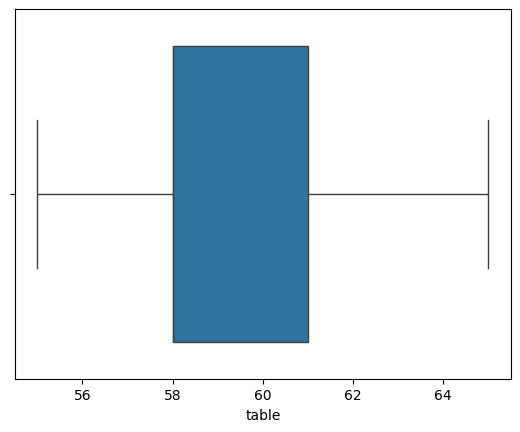

In [8]:
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

df_table = df["table"].head()
a = sns.boxplot(x = df_table)
plt.show()

In [9]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)

IQR = Q3 - Q1

print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")

Q1 = 58.0, Q3 = 61.0, IQR = 3.0


In [11]:
low_lmt = Q1 - 1.5 * IQR # 58.0 - 1.5 * 3.0 = 53.5: low_lmt
up_lmt = Q3 + 1.5 * IQR # 61.0 + 1.5 * 3.0 = 65.5: up_lmt

(df_table < low_lmt) | (df_table > up_lmt)

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [16]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [12]:
outlier_df = (df_table < low_lmt) | (df_table > up_lmt)
a = df_table[outlier_df]

Series([], Name: table, dtype: float64)

In [14]:
a = df_table[outlier_df].index
a

Index([], dtype='int64')

### to solve the outlier value problem

In [17]:
# deletion structure

import pandas as pd

type(df_table)

pandas.core.series.Series

In [18]:
df_table = pd.DataFrame(df_table)
df_table.shape

(5, 1)

In [19]:
d_df = df_table[~((df_table < (low_lmt))) | ((df_table > (up_lmt))).any(axis=1)]
d_df.shape

(5, 1)

In [21]:
# structure of change with mean

df_table[outlier_df] = df_table.mean()
mmean = df_table[outlier_df]
print(mmean)

Empty DataFrame
Columns: [table]
Index: []


In [22]:
# suppression method

df_table[outlier_df] = low_lmt
# or
df_table[outlier_df] = up_lmt

### Local Outlier Factor (LOF)
Identifying values ​​that may be outliers by scoring observations based on density in their location

In [24]:
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()

df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [34]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
fit = clf.fit_predict(df)
df_scores = clf.negative_outlier_factor_
print(df_scores[0:10])


[-1.58352526 -1.59732899 -1.62278873 -1.33002541 -1.30712521 -1.28408436
 -1.28428162 -1.26458706 -1.28422952 -1.27351342]


In [35]:
np.sort(df_scores[0:10])

array([-1.62278873, -1.59732899, -1.58352526, -1.33002541, -1.30712521,
       -1.28428162, -1.28422952, -1.28408436, -1.27351342, -1.26458706])

In [36]:
np.sort(df_scores)[0:10]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387])

In [37]:
threshold_val = np.sort(df_scores)[13] # number of 13 is our threshold value
outlier_df = df_scores > threshold_val
new_df = df[df_scores > threshold_val]

df[df_scores < threshold_val]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [38]:
# suppression method

suppression_val = df[df_scores == threshold_val]
outliers = df[~outlier_df]
outliers.to_records(index = False)
res = outliers.to_records(index = False)
res[:] = suppression_val.to_records(index = False)
df[~outlier_df] = pd.DataFrame(res, index = df[~outlier_df].index)